## HW3 Jinyu Zhao A53324435

### Experiment of predictive, MAP, MLE on different training sets under strategy 1

The orange line denotes MLE result, the green line is MAP and the blue line is predictive distribution

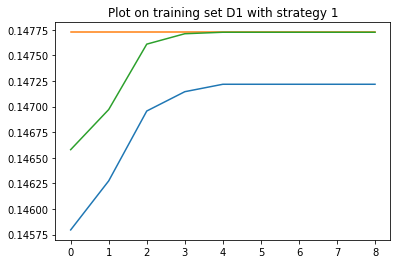

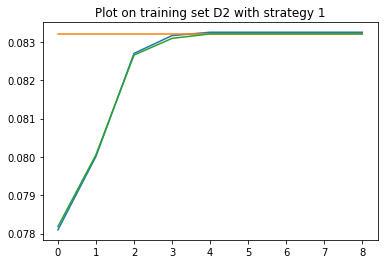

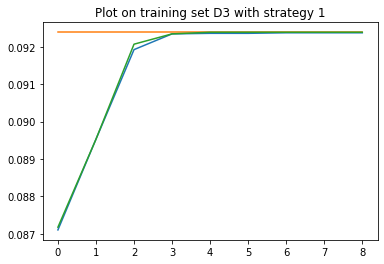

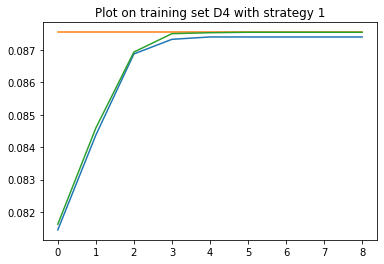

In [18]:
for j in range(4):
    Bayesian_BDR = []
    ML_BDR_result = []
    MAP_BDR_result = []
    for i in range(len(alpha[0])):
        mask = BDR(i, FG[j], BG[j], 1)
        Bayesian_BDR.append(compute_error_prob(mask))
        mask = ML_BDR(i, FG[j], BG[j])
        ML_BDR_result.append(compute_error_prob(mask))
        mask = MAP_BDR(i, FG[j], BG[j], 1)
        MAP_BDR_result.append(compute_error_prob(mask))
    plt.plot(np.arange(len(Bayesian_BDR)), Bayesian_BDR, np.arange(len(Bayesian_BDR)), ML_BDR_result, np.arange(len(Bayesian_BDR)), MAP_BDR_result)
    plt.title("Plot on training set D{} with strategy 1".format(j + 1))
    plt.show()

## (1) The relative behavior of these three curves:
#### Observations: 
The MLE solution is clearly a straight line since its estimation of class-conditional distribution is maximum likelihood, which is sample mean and sample variance in Gaussian case. <br>
The predictive equation is slightly better than MAP because it doesn't lose any information of the posterior distribution. <br>
The PoE of predictive equation and MAP line converge to the PoE of ML estimation as alpha increases. <br>

#### Explainations:
As the $\alpha$ increases, the element in a priori covariance matrix becomes larger, which means the prior knowledge is less concentrated around $\mu_0$ and less informative such that the prior distribution contains less information. We can also see it from the eqautions. 
<br>$\mu_1=\Sigma_0(\Sigma_0+\frac{1}{N}\Sigma)^{-1}(\frac{1}{N}\sum_{i=1}^{N}x_i)+\frac{1}{N}\Sigma(\Sigma_0+\frac{1}{N}\Sigma)^{-1}\mu_0$ 
<br>
$\quad\Sigma_1=\Sigma_0(\Sigma_0+\frac{1}{N}\Sigma)^{-1}\frac{1}{N}\Sigma$ <br>
The posterior mean $\mu_1$ we get is a combination of ML estimation of mean $\frac{1}{N}\sum_{i=1}^{N}x_i$ and prior distribution $\mu_0$. If the covariance matrix $\Sigma$ gets larget, it dominates the behavior of $(\Sigma_0+\frac{1}{N}\Sigma)^{-1}$, which leads $\Sigma_0(\Sigma_0+\frac{1}{N}\Sigma)^{-1}$ to be almost $I$. So $\mu_n$ and $\Sigma_n$ goes to ML estimation $\hat \mu_n$ and $\hat \Sigma$. <br>

## (2) How that behavior changes from dataset to dataset:

#### Observations:
It could be seen from the plot that in dataset D1, the predictive equation and MAP performs clearly better than MLE when $\alpha$ is small across all dataset. <br>
The predictive equaiton and MAP all tends to converge to MLE when $\alpha$ gets larger, except for D1 and D4, where in the end Bayesian predictive is still better than MLE.<br>
The error rate is the smallest in D2 for all three methods and become slightly larger in D3 and D4. 
#### Explanation:
In a smaller dataset such as D1, the prior information is more important. That's why Bayesian predictive and MAP are better than MLE. When the size of dataset gets larger, the influence of prior information becomes less important.

### Experiment of predictive, MAP, MLE on different training sets under strategy 2

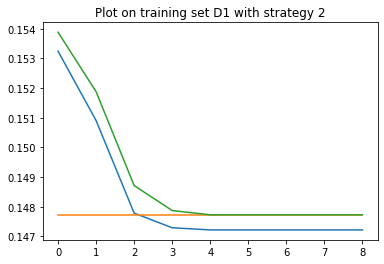

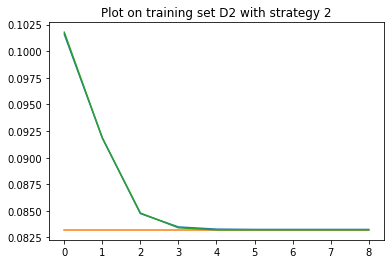

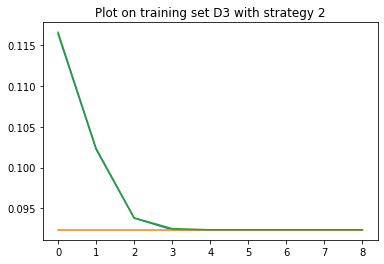

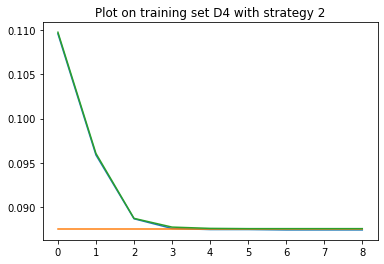

In [21]:
for j in range(4):
    Bayesian_BDR = []
    ML_BDR_result = []
    MAP_BDR_result = []
    for i in range(len(alpha[0])):
        mask = BDR(i, FG[j], BG[j], 2)
        Bayesian_BDR.append(compute_error_prob(mask))
        mask = ML_BDR(i, FG[j], BG[j], 2)
        ML_BDR_result.append(compute_error_prob(mask))
        mask = MAP_BDR(i, FG[j], BG[j], 2)
        MAP_BDR_result.append(compute_error_prob(mask))
    plt.plot(np.arange(len(Bayesian_BDR)), Bayesian_BDR, np.arange(len(Bayesian_BDR)), ML_BDR_result, np.arange(len(Bayesian_BDR)), MAP_BDR_result)
    plt.title("Plot on training set D{} with strategy 2".format(j + 1))
    plt.show()

## (3) How all of the above change when strategy 1 is replaced by strategy 2:
#### Observation:
The MLE does not change under both strategies since it does not need prior information. <br>
Under smaller $\alpha$, the PoE of Bayesian predictive and MAP is larger than MLE instead of smaller. <br>
Under larger $\alpha$, the PoE of Bayesian predivtive and MAP converges to MLE and Bayesian predictive is slightly below MLE.

#### Exlanation:
The prior information given by strategy 2 is a "bad" prior in the sense that it doesn't help the classification task. Therefore, under small $\alpha$, where the prior information is more certain about that $\mu_0$ of cheetah and grass are the same. This prior gives rise to the larger PoE.  

In [ ]:
import numpy as np
import scipy.io
import matplotlib.pyplot as plt
%matplotlib inline

mat = scipy.io.loadmat('hw3Data/TrainingSamplesDCT_subsets_8')
Alpha = scipy.io.loadmat('hw3Data/Alpha')
prior_1 = scipy.io.loadmat('hw3Data/Prior_1')
prior_2 = scipy.io.loadmat('hw3Data/Prior_2')

mu0_FG_1 = prior_1["mu0_FG"]
mu0_BG_1 = prior_1["mu0_BG"]
W0_1 = prior_1["W0"]
mu0_FG_2 = prior_2["mu0_FG"]
mu0_BG_2 = prior_2["mu0_BG"]
W0_2 = prior_2["W0"]
alpha = Alpha["alpha"]

from scipy.fftpack import dct

# import zig-zag pattern
with open("Zig-Zag Pattern.txt", "r") as f:
    content = f.readlines()
    
zigzag = []
for line in content:
    index = []
    for num in line.strip().split(" "):
        if num != "":
            index.append(int(num))
    if index!=[]:        
        zigzag.append(index)
zigzag = np.array(zigzag)

def dct2(block):
    return dct(dct(block.T, norm='ortho').T, norm='ortho')

def gen_zigzag_arr(block):
    arr = np.zeros(64)
    for i, line in enumerate(zigzag):
        for j, index in enumerate(line):
            arr[index] = block[i, j]
    return arr

from PIL import Image
import numpy as np
#img = Image.open("cheetah.bmp", "r")
#img = np.array(img) 
im = scipy.io.loadmat('im_double.mat')
img = im['img']

def slicing(img):
    out = []
    for i in range(len(img) - 7):
        out.append([])
        for j in range(len(img[i]) - 7):
            window = img[i:i+8, j:j+8]
            dct_result = dct2(window)
            arr = gen_zigzag_arr(dct_result)
            out[i].append(arr)
    return out
X_processed = np.array(slicing(img))

def compute_posterior(x, mu0, w0, alpha):
    n = x.shape[0]
    sample_mean = np.mean(x, axis = 0)
    #sample_var = 1 / n * (x - sample_mean).T.dot(x - sample_mean)
    sample_var = np.cov(x.T)
    sigma0 = np.zeros((64,64))
    for i in range(64):
        sigma0[i, i] = alpha * w0[0, i]
    var_inv = np.linalg.inv(sigma0 + 1/n * sample_var)
    mu_n = np.matmul(np.matmul(sigma0, var_inv), sample_mean) + 1 / n * np.matmul(np.matmul(sample_var, var_inv), mu0)
    var_n = np.matmul(np.matmul(sigma0, var_inv), 1 / n * sample_var)
    return mu_n, var_n

def decision_function(x, mu, var, prior):
    Wi = np.linalg.inv(var)
    wi = -2 * np.matmul(Wi, mu)
    w_0 = np.dot(mu.T, -1/2*wi) + np.log((2*np.pi)**64 * np.linalg.det(var)) - 2*np.log(prior)
    return np.dot(x.T, np.matmul(Wi, x)) + np.dot(wi.T, x) + w_0


def BDR(k, FG, BG, strategy = 1):
    total = FG.shape[0] + D1_BG.shape[0]
    prior_1  = FG.shape[0] / total
    prior_0 = BG.shape[0] / total
    #print(prior_0, prior_1)
    if strategy == 1:
        mu_n_BG, var_n_BG = compute_posterior(BG, mu0_BG_1[0], W0_1, alpha[0, k])
        mu_n_FG, var_n_FG = compute_posterior(FG, mu0_FG_1[0], W0_1, alpha[0, k])
    else:
        #print(mu0_BG_2[0], W0_2, alpha[0, k])
        mu_n_BG, var_n_BG = compute_posterior(BG, mu0_BG_2[0], W0_2, alpha[0, k])
        mu_n_FG, var_n_FG = compute_posterior(FG, mu0_FG_2[0], W0_2, alpha[0, k])

    n_0 = BG.shape[0]
    sample_mean_0 = np.mean(BG, axis = 0)
    #sample_var_0 = 1 / n_0 * (D1_BG - sample_mean_0).T.dot(D1_BG - sample_mean_0)
    sample_var_0 = np.cov(BG.T)

    n_1 = FG.shape[0]
    sample_mean_1 = np.mean(FG, axis = 0)
    #sample_var_1 = 1 / n_1 * (D1_FG - sample_mean_1).T.dot(D1_FG - sample_mean_1)
    sample_var_1 = np.cov(FG.T)

    mask = np.zeros((X_processed.shape[0] + 7, X_processed.shape[1] + 7))
    
    mu_0 = mu_n_BG
    var_0 = var_n_BG + sample_var_0
    mu_1 = mu_n_FG
    var_1 = var_n_FG + sample_var_1
    
    for i in range(len(X_processed)):
        for j in range(len(X_processed[i])):
            result0 = decision_function(X_processed[i,j],  mu_0, var_0, prior_0)
            result1 = decision_function(X_processed[i,j],  mu_1, var_1, prior_1)
            if result1 < result0:
                mask[i,j] = 1
            else:
                mask[i,j] = 0
    return mask

def compute_error_prob(mask):
    ground_truth = Image.open("cheetah_mask.bmp", "r")
    ground_truth = (np.array(ground_truth) /255).astype(int) 
    return np.sum(ground_truth != mask) / (ground_truth.shape[0] * ground_truth.shape[1])

# ML:

def ML_BDR(k, FG, BG, strategy = 1):
    total = FG.shape[0] + BG.shape[0]
    prior_1  = FG.shape[0] / total
    prior_0 = BG.shape[0] / total
    sample_mean_0 = np.mean(BG, axis = 0)
    sample_var_0 = np.cov(BG.T)
    sample_mean_1 = np.mean(FG, axis = 0)
    sample_var_1 = np.cov(FG.T)

    mask = np.zeros((X_processed.shape[0] + 7, X_processed.shape[1] + 7))
    for i in range(len(X_processed)):
        for j in range(len(X_processed[i])):
            result0 = decision_function(X_processed[i,j],  sample_mean_0, sample_var_0, prior_0)
            result1 = decision_function(X_processed[i,j],  sample_mean_1, sample_var_1, prior_1)
            if result1 < result0:
                mask[i,j] = 1
            else:
                mask[i,j] = 0
    return mask

"""
def decision_function(x, mu, var, prior):
    inv = np.linalg.inv(var)
    d = np.dot(np.matmul(inv, (x - mu)), (x - mu).T)
    a = np.log(2 * np.pi) ** 64 * np.linalg.det(var) - 2 * np.log(prior)
    return d + a
"""

def MAP_BDR(k, FG, BG, strategy = 1):
    total = FG.shape[0] + BG.shape[0]
    prior_1  = FG.shape[0] / total
    prior_0 = BG.shape[0] / total
    if strategy == 1:
        mu_n_BG, var_n_BG = compute_posterior(BG, mu0_BG_1[0], W0_1, alpha[0, k])
        mu_n_FG, var_n_FG = compute_posterior(FG, mu0_FG_1[0], W0_1, alpha[0, k])
    else:
        mu_n_BG, var_n_BG = compute_posterior(BG, mu0_BG_2[0], W0_2, alpha[0, k])
        mu_n_FG, var_n_FG = compute_posterior(FG, mu0_FG_2[0], W0_2, alpha[0, k])

    n_0 = BG.shape[0]
    sample_mean_0 = np.mean(BG, axis = 0)
    sample_var_0 = np.cov(BG.T)

    n_1 = FG.shape[0]
    sample_mean_1 = np.mean(FG, axis = 0)
    sample_var_1 = np.cov(FG.T)

    mask = np.zeros((X_processed.shape[0] + 7, X_processed.shape[1] + 7))
    
    for i in range(len(X_processed)):
        for j in range(len(X_processed[i])):
            result0 = decision_function(X_processed[i,j],  mu_n_BG, sample_var_0, prior_0)
            result1 = decision_function(X_processed[i,j],  mu_n_FG, sample_var_1, prior_1)
            if result1 < result0:
                mask[i,j] = 1
            else:
                mask[i,j] = 0
    return mask

BG = [mat["D1_BG"],mat["D2_BG"],mat["D3_BG"],mat["D4_BG"]]
FG = [mat["D1_FG"],mat["D2_FG"],mat["D3_FG"],mat["D4_FG"]]